In [2]:
from sklearn import datasets
import numpy as np
import os, sys
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))  # from chapter_2 -> project root
if project_root not in sys.path:
    sys.path.insert(0, project_root)

### Sigmoid

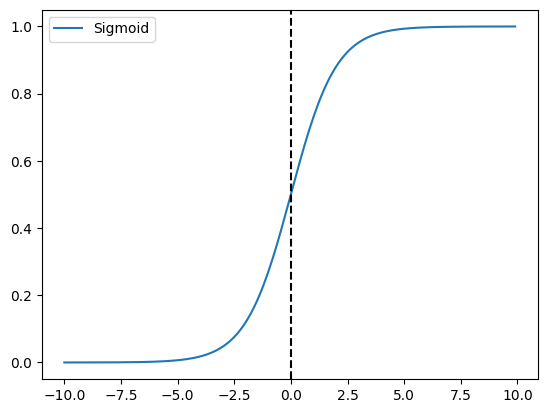

In [3]:
import matplotlib.pyplot as plt
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
x = np.arange(-10., 10., 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.axvline(0, color='k', ls='--')
plt.legend(['Sigmoid'])
plt.show()

### Loss functions

(0.0, 1.0)

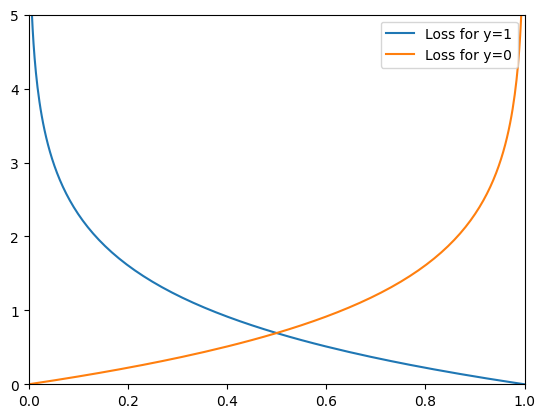

In [4]:
def loss_1(x):
    return -np.log(sigmoid(x))
def loss_0(x):
    return -np.log(1 - sigmoid(x))

x = np.arange(-10., 10., 0.1)
sigmoid_x = sigmoid(x)
y1 = loss_1(x)
y0 = loss_0(x)
plt.plot(sigmoid_x, y1, label='Loss for y=1')
plt.plot(sigmoid_x, y0, label='Loss for y=0')
plt.legend()
plt.ylim(0, 5)
plt.xlim(0, 1)

In [5]:
from chapter_3.logistic_regression import LogisticRegressionSGD
import pandas as pd

iris_dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(iris_dataset_url, header=None)
df = df.iloc[:100]
y = np.where(df.iloc[:, -1].values == "Iris-setosa", 0, 1)
X = df.iloc[:100, [0, 2]].values

In [6]:
standarized_X = np.copy(X)
standarized_X[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
standarized_X[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

In [7]:
logistic_regression = LogisticRegressionSGD(learning_rate=0.1, n_iterations=1000, random_state=42)
logistic_regression.fit(standarized_X, y)

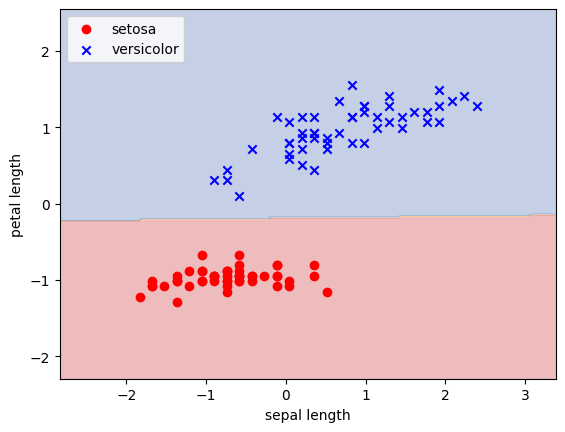

In [8]:
from visualization.visualization import plot_data, plot_decision_regions
    
plot_decision_regions(standarized_X, y, classifier=logistic_regression)
plot_data(standarized_X)
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.legend(loc="upper left")
plt.show()

/home/domin/learning/MachineLearningWithPytorch/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


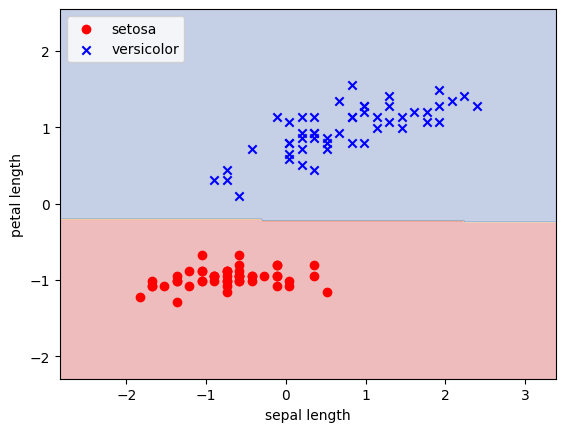

In [10]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100, solver="lbfgs", multi_class="ovr")
lr.fit(standarized_X, y)
plot_decision_regions(standarized_X, y, classifier=lr)
plot_data(standarized_X)

In [14]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)  # calculate mean and std
X_train_std = sc.transform(X_train)  # transform
X_test_std = sc.transform(X_test)  # transform based on train mean and std

In [17]:
lr = LogisticRegression(C=100, solver="lbfgs", multi_class="ovr")
lr.fit(X_train_std, y_train)

/home/domin/learning/MachineLearningWithPytorch/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,100
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'ovr'


/home/domin/learning/MachineLearningWithPytorch/visualization/visualization.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
/home/domin/learning/MachineLearningWithPytorch/visualization/visualization.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[y_test == cl, 0],


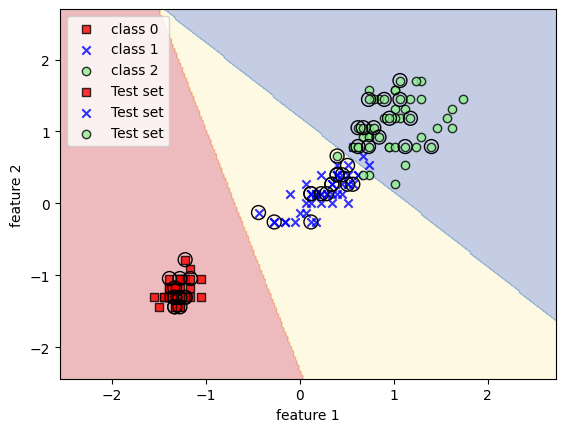

In [18]:
from visualization.visualization import plot_decision_regions, plot_data_universtal


plot_decision_regions(X_train_std, y_train, classifier=lr)
plot_data_universtal(X_train_std, y_train, X_test=X_test_std, y_test=y_test)

In [19]:
print('Accuracy: %.3f' % lr.score(X_test_std, y_test))

Accuracy: 0.978


In [20]:
lr.predict_proba(X_test_std[:3, :])

array([[6.63770505e-09, 1.44747233e-01, 8.55252760e-01],
       [8.34031210e-01, 1.65968790e-01, 3.20815954e-13],
       [8.48822884e-01, 1.51177116e-01, 2.57998350e-14]])

In [21]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)  # each row sums to 1

array([1., 1., 1.])

In [22]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [23]:
lr.predict(X_test_std[0, :].reshape(1, -1))  # reshape to 2D array

array([2])

In [25]:
lr.predict(X_test_std[:1, :])

array([2])

/home/domin/learning/MachineLearningWithPytorch/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/domin/learning/MachineLearningWithPytorch/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/domin/learning/MachineLearningWithPytorch/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warn

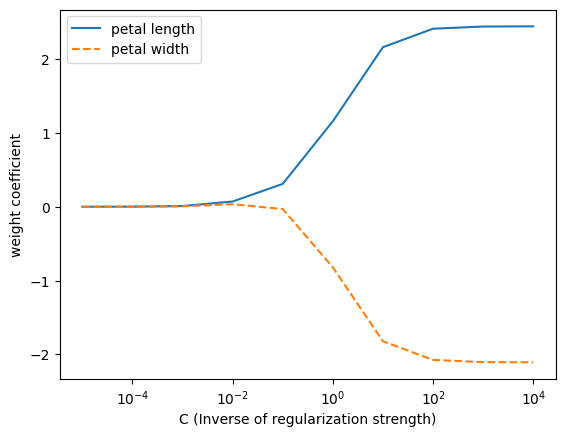

In [26]:
weights, params = [], []
for c in np.arange(-5., 5., 1):
    lr = LogisticRegression(C=10.**c, solver="lbfgs", multi_class="ovr")
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], label='petal width', linestyle='--')
plt.xlabel('C (Inverse of regularization strength)')
plt.ylabel('weight coefficient')
plt.legend()
plt.xscale('log')
plt.show()